In [2]:
#Importing all important packages

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

## Question 1

Part (1.a)

(6000.0, 7000.0)

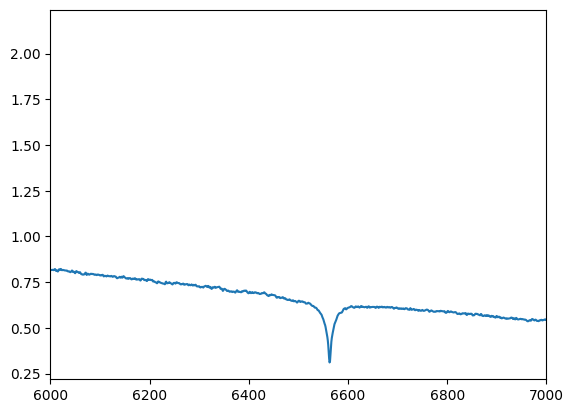

In [3]:
star1 = np.genfromtxt('star1.txt',names = True) #Creating arrays for wavelength and flux
plt.plot(star1['Wavelength'], star1['Flux'])    #Plotting Wavelength and Flux to see spectra
plt.xlim(6000,7000)                             #Limiting the spectra on the plot to be only the absorption feature Ha and surrounding continuum

(4500.0, 5800.0)

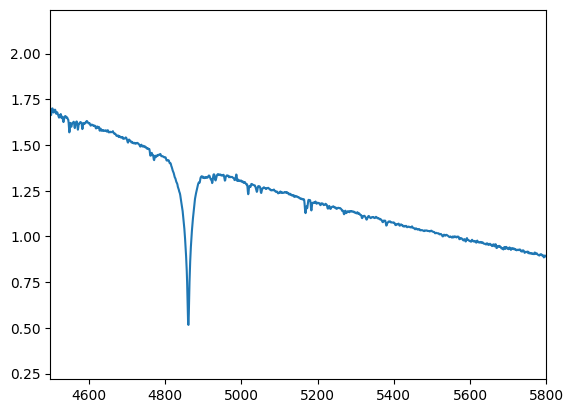

In [4]:
plt.plot(star1['Wavelength'], star1['Flux'])    #Same as previous cell just with limits of x focusing on Hbeta
plt.xlim(4500,5800)

In [5]:
Ha_Mask = ((star1['Wavelength'] > 6540) & (star1['Wavelength'] < 6580))                    #Mask only including the absorption feature Ha
Ha_Mask = ~Ha_Mask                                                                         #Inverting the mask to include all but the absorption Ha
mask2_a = ((star1['Wavelength'][Ha_Mask] > 6000) & (star1['Wavelength'][Ha_Mask] < 7000))  #Masking all spectra except for the continuum just around the absorption Ha
# print(star1['Wavelength'][Ha_Mask][mask2_a])


Hb_Mask = ((star1['Wavelength'] > 4800) & (star1['Wavelength'] < 4900))                    #Same thing here but for Hbeta
Hb_Mask = ~Hb_Mask
mask2_b = ((star1['Wavelength'][Hb_Mask] > 4500) & (star1['Wavelength'][Hb_Mask] < 5800))
# print(star1['Wavelength'][Hb_Mask][mask2_b])

In [6]:
Ha_fit = np.polyfit(star1['Wavelength'][Ha_Mask][mask2_a],star1['Flux'][Ha_Mask][mask2_a],1)    #Making a 1d poly fit of the continuum for Ha and Hbeta
Hb_fit = np.polyfit(star1['Wavelength'][Hb_Mask][mask2_b],star1['Flux'][Hb_Mask][mask2_b],1)
# print(Ha_fit)
# print(Hb_fit)

(0.0, 1.25)

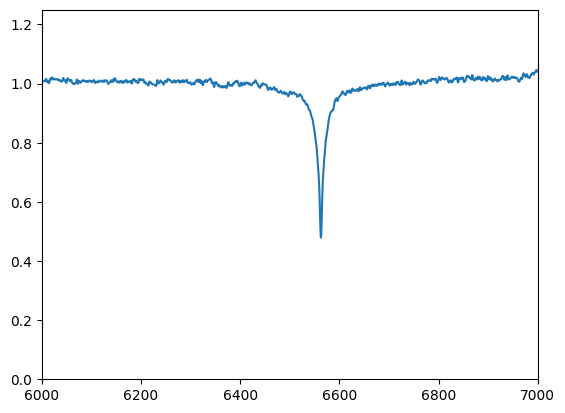

In [7]:
plt.plot(star1['Wavelength'], star1['Flux'] / (Ha_fit[0] * star1['Wavelength'] + Ha_fit[1]))    #normalizing the spectra around Ha by dividing out the fitted continuum.
plt.xlim(6000,7000)
plt.ylim(0,1.25)

(0.0, 1.25)

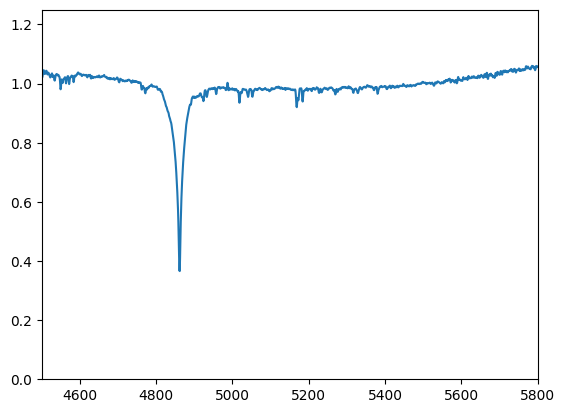

In [8]:
plt.plot(star1['Wavelength'], star1['Flux'] / (Hb_fit[0] * star1['Wavelength'] + Hb_fit[1]))    #normalizing the spectra around Ha by dividing out the fitted continuum.
plt.xlim(4500,5800)
plt.ylim(0,1.25)

Part (1.b)

In [9]:
F_lambda_a = star1['Flux'][~Ha_Mask] / (Ha_fit[0] * star1['Wavelength'][~Ha_Mask] + Ha_fit[1]) #Flux values during the absorption Ha

Lambda_a = star1['Wavelength'][~Ha_Mask]                                                       #Wavlength values during the absorption

# plt.plot(Lambda_a,F_lambda_a)

Wa = 1/6562.3 * simpson(1-F_lambda_a, Lambda_a)                                                #Using simpsons rule to evaluate the integral to get the equivalent widths

print(Wa)


0.0014030522833585986


0.0032806760944173313


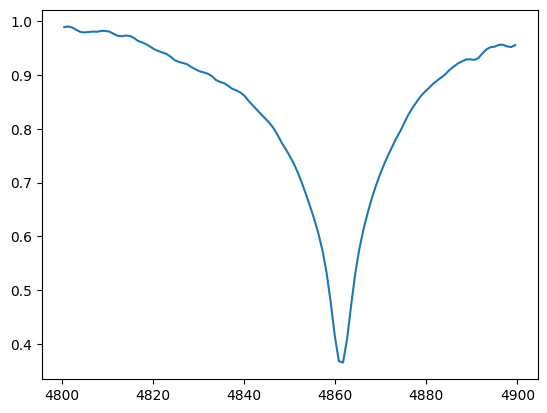

In [10]:
F_lambda_b = star1['Flux'][~Hb_Mask] / (Hb_fit[0] * star1['Wavelength'][~Hb_Mask] + Hb_fit[1])
Lambda_b = star1['Wavelength'][~Hb_Mask]
Wb = 1/4861.3 * simpson(1-F_lambda_b,Lambda_b)
plt.plot(Lambda_b,F_lambda_b)
print(Wb)

Part (1.c)

In [ ]:
fa = 0.6407
fb = 0.1193
Na_alpha = 1.130e12 * Wa / (fa * 6562.8)
Na_beta = 1.130e12 * Wb / (fb * 4861.3)
print(Na_alpha)
print(Na_beta)

print(np.log(Na_alpha)/np.log(Na_beta)) #!!!!!! You must take the log for the ratio, The curve of growth is a log plot

104441788.2072745
6392179.041052413
1.1782674041156769


## Question 2

Part (2.a)

In [12]:
history = np.genfromtxt('history.data',names = True, skip_header=5)

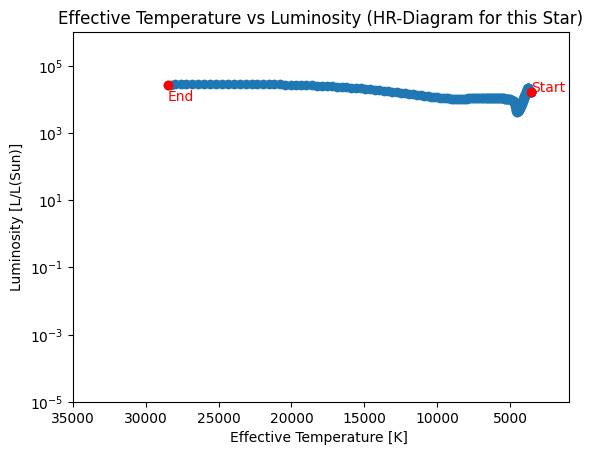

In [13]:
plt.scatter(10**history['log_Teff'],10**history['log_L'])
plt.scatter(10**history['log_Teff'][0],10**history['log_L'][0], c = 'r')
plt.scatter(10**history['log_Teff'][-1],10**history['log_L'][-1], c = 'r')
plt.text(10**history['log_Teff'][0],10**history['log_L'][0],'Start',c = 'r')
plt.text(10**history['log_Teff'][-1],10**history['log_L'][-1]-17000,'End',c = 'r')
plt.xlabel('Effective Temperature [K] ')
plt.ylabel(r'Luminosity [L/L(Sun)]')
plt.title('Effective Temperature vs Luminosity (HR-Diagram for this Star)')
plt.xlim(1000, 35000)
plt.yscale('log')
plt.ylim(1e-5,1e6)
plt.gca().invert_xaxis()

Text(0.5, 1.0, 'Radius vs. Luminosity')

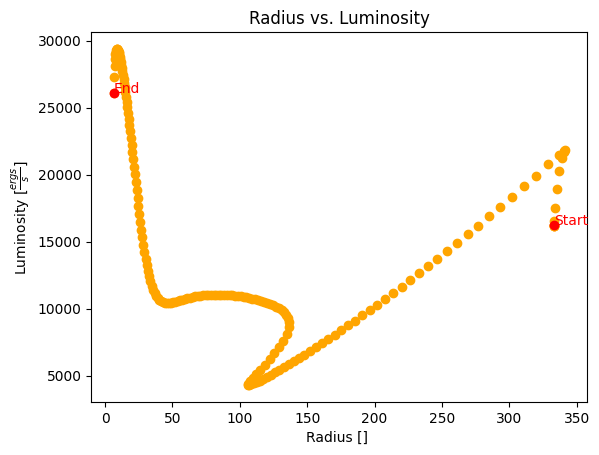

In [14]:
plt.scatter(history['radius'],history['luminosity'], c='orange')
plt.scatter(history['radius'][0],history['luminosity'][0], c='r')
plt.scatter(history['radius'][-1],history['luminosity'][-1], c='r')
plt.text(history['radius'][0],history['luminosity'][0], 'Start',c='r')
plt.text(history['radius'][-1],history['luminosity'][-1], 'End',c='r')
plt.xlabel('Radius [] ')
plt.ylabel(r'Luminosity [$\frac{ergs}{s}$]')
plt.title('Radius vs. Luminosity')

Part (2.b)

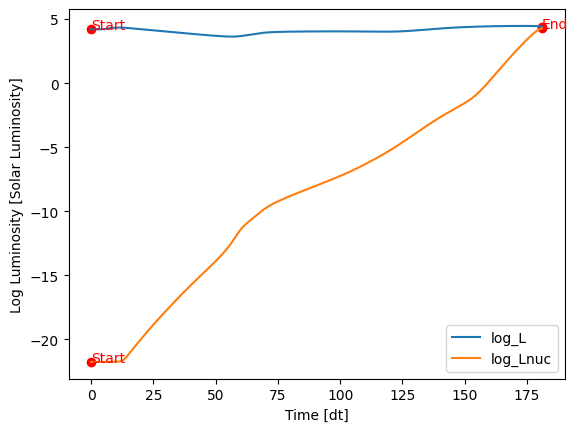

In [15]:
t = np.linspace(0,181,181)
# print(t)
plt.plot(t,history['log_L'], label = "log_L")
plt.plot(t,history['log_Lnuc'], label = "log_Lnuc")
plt.scatter(t[0],history['log_Lnuc'][0],c='r')
plt.text(t[0],history['log_Lnuc'][0],'Start',c='r')
plt.scatter(t[-1],history['log_Lnuc'][-1],c='r')
plt.text(t[-1],history['log_Lnuc'][-1],'End',c='r')
plt.scatter(t[0],history['log_L'][0],c='r')
plt.text(t[0],history['log_L'][0],'Start',c='r')
plt.scatter(t[-1],history['log_L'][-1],c='r')
plt.ylabel('Log Luminosity [Solar Luminosity]')
plt.xlabel('Time [dt]')
plt.legend()